In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Convolutional Neural Network with a two-layer architecture. The input layer consists of 784 pixels, representative of each 28x28 image. Then I use a hidden layer which has 10 units and a ReLU activation function. Then, another output layer which has 10 digit classes and uses softmax. I use backpropagation to tell how much the error of the prediction deviates from the true value and hot encoding. The overall accuracy is ~85%.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata

In [ ]:
data = pd.read_csv(userdata.get('PATH_TRAIN'))

In [ ]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.

In [ ]:
X_train[:, 0].shape # first column

(784,)

In [ ]:
# Initialize all our parameters
def init_params():
    W1 = np.random.rand(10, 784) - 0.5 # randn makes output between -0.5 and 0.5, where rand makes output between 0 and 1
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    Ans = np.maximum(Z, 0)
    return Ans

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def derivRelu(Z):
    Ans = Z > 0
    return Ans

def backprop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * derivRelu(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2


In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 50 == 0:
            print("iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.1)

iteration:  0
[2 2 2 ... 2 0 2] [7 6 0 ... 6 3 3]
Accuracy:  0.09473170731707317
iteration:  50
[9 6 0 ... 6 8 8] [7 6 0 ... 6 3 3]
Accuracy:  0.4448536585365854
iteration:  100
[9 2 0 ... 6 8 3] [7 6 0 ... 6 3 3]
Accuracy:  0.604170731707317
iteration:  150
[7 2 0 ... 6 8 3] [7 6 0 ... 6 3 3]
Accuracy:  0.7142439024390244
iteration:  200
[7 2 0 ... 6 5 3] [7 6 0 ... 6 3 3]
Accuracy:  0.764219512195122
iteration:  250
[7 2 0 ... 6 5 3] [7 6 0 ... 6 3 3]
Accuracy:  0.7915853658536586
iteration:  300
[7 2 0 ... 6 5 3] [7 6 0 ... 6 3 3]
Accuracy:  0.8099268292682927
iteration:  350
[7 2 0 ... 6 3 3] [7 6 0 ... 6 3 3]
Accuracy:  0.8219512195121951
iteration:  400
[7 2 0 ... 6 3 3] [7 6 0 ... 6 3 3]
Accuracy:  0.8310243902439024
iteration:  450
[7 2 0 ... 6 3 3] [7 6 0 ... 6 3 3]
Accuracy:  0.8381219512195122


In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [7]
Label:  7


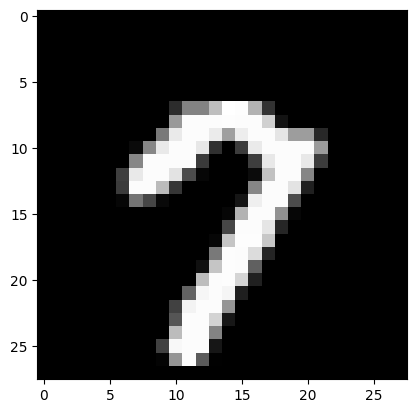

Prediction:  [2]
Label:  6


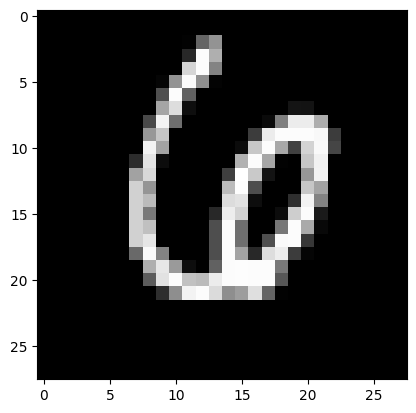

Prediction:  [0]
Label:  0


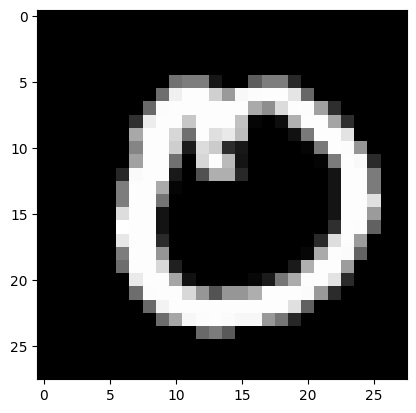

Prediction:  [5]
Label:  5


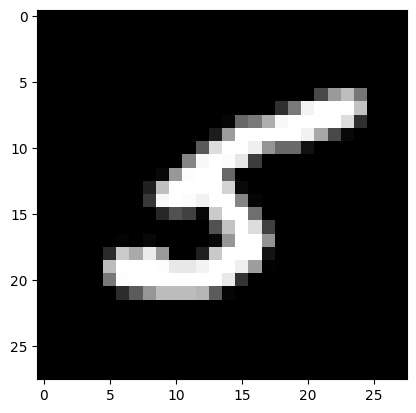

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [ ]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[4 2 1 8 1 0 2 8 1 1 4 8 0 6 1 6 9 3 7 0 2 4 1 4 8 8 2 6 3 7 9 9 3 2 2 0 3
 3 1 3 8 1 4 0 4 8 7 0 9 5 5 6 2 2 3 9 1 6 4 0 8 1 4 3 7 9 7 0 9 2 6 6 3 2
 4 9 7 4 1 2 0 0 4 1 6 3 9 5 2 6 7 0 8 1 6 8 8 1 8 8 6 6 3 4 4 9 5 4 4 9 3
 6 9 6 9 0 8 1 2 5 3 2 1 1 8 0 4 7 3 5 1 9 2 2 3 0 5 6 6 5 1 3 1 2 1 3 4 0
 0 4 7 5 3 2 0 5 0 6 6 3 4 0 2 2 5 7 9 7 3 1 1 3 3 0 9 2 4 2 8 8 9 2 4 3 3
 3 4 1 8 6 0 8 3 1 3 6 0 8 8 5 8 6 7 6 3 8 0 2 1 1 1 6 8 8 8 5 2 4 8 3 1 5
 8 0 1 9 6 9 6 7 0 7 2 0 0 7 1 3 6 8 1 0 0 6 2 9 6 1 9 1 1 7 2 4 0 3 6 8 6
 7 5 5 4 8 9 7 0 7 5 1 1 7 6 6 9 7 4 4 9 2 1 0 3 2 7 9 6 8 8 0 9 3 3 3 8 7
 5 0 8 9 3 0 0 3 0 3 2 0 3 1 0 6 2 0 3 0 1 8 6 8 0 7 5 5 5 8 2 7 0 5 7 5 6
 3 6 3 1 0 9 2 7 3 2 9 6 1 1 2 3 0 7 6 7 9 5 7 9 5 2 2 5 6 6 1 7 3 1 0 4 4
 4 6 5 1 1 2 7 6 4 9 9 7 4 3 5 1 9 7 6 0 3 7 0 6 8 7 0 7 5 0 2 8 3 0 1 3 3
 3 7 2 1 5 5 9 0 0 4 8 3 7 5 2 9 4 3 3 1 7 7 5 1 1 8 0 0 7 9 9 7 5 1 5 0 9
 1 5 4 3 5 7 6 5 8 3 8 3 4 0 4 7 5 3 8 3 9 0 4 9 4 4 6 4 6 4 5 0 4 0 6 4 0
 4 2 7 8 2 7 3 8 7 9 8 6 

0.857